## Introduction to Linear Regression

Linear regression mostly used method for solving linear regression kind of problems, because linear regression needs less computational power compared to other regression methods and it’s the best approach to find the relation between different attributes. Suppose finding the relation between increase in temperature leads to increase in cool drinks or not.

Linear Regression means predicting scores of one variable from the scores of the second variable. The variable we are predicting is called the criterion variable and is referred to as Y. The variable we are basing our predictions is known as the predictor variable and is referred to as X. When there is only one predictor variable, the prediction method is called simple regression.The aim of linear regression is to find the best-fitting straight line through the points. The best-fitting line is called a regression line.
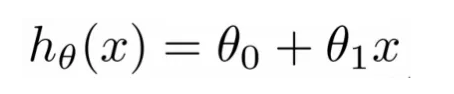

## Properties of Linear Regression

* 1. The Line minimizes the sum of squared differences between the observed and predicted values
* 2. The Regression Line passes through the mean of the feature and target values
* 3. The Regression Constant is equal to the y-intercept of the regression line.
* 4. The regression coefficient (θ1) is the average change in the dependent variable (Y) for a 1-unit change in the independent variable (X). It is the slope of the regression line.

## Goal of Hypothesis Function

* The goal of Hypothesis is to choose θ0 and θ1 so that hθ(x) is close to Y for our training data while choosing θ0 and θ1 we have to consider the cost function( J(θ) ) where we are getting low value for cost function( J(θ) ).

* The below function is called as a cost function, the cost function ( J(θ) ) is nothing but just a Squared error function.
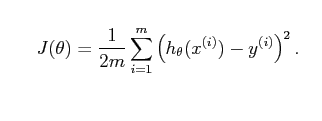

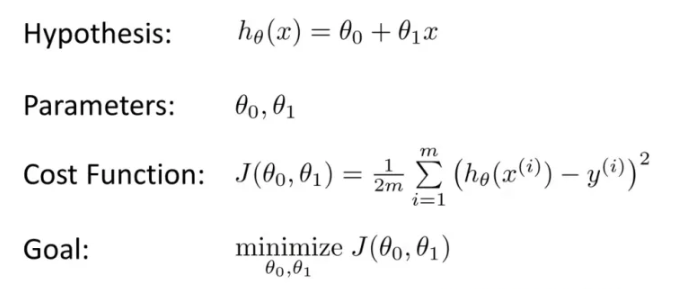

**LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.**

## Parameters of Linear Regression

* 1. ```fit_intercept```: bool, optional, default = True
     * Whether to calculate the Intercept for this Model, If set to False, then no Intercept would be used in the calculations.
     
* 2. ```normalize```: bool, optional, default = False
    * This Parameter is ignored if **fit_intercept is set to False.** If True the features would be normalized before regression.
    
* 3. ```copy_X```: bool, optional, default = True
    * If True, X would be copied or else it would be overwritten.

* 4. ```n_jobs```: int or None, optional, default = None
    * The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors

## Attributes of Linear Regression

* 1. ```coef_```: It returns (n_targets, n_features)
    * Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
    
* 2. ```rank_```: Rank of matrix X. Only available when X is dense.

* 3. ```singular```: array of shape (min(X, y),)

* 4. ```intercept```: float or array of shape of (n_targets,)


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lets read the dataset
data = pd.read_csv('boston/housing.csv')

# lets check the shape of dataset
data.shape

(489, 4)

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [5]:
data.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [6]:
y = data['MEDV']
x = data.drop(['MEDV'], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("Root Mean Squared Error :", rmse)
r2 = r2_score(y_test, y_pred1)
print("R2 Score :", r2)

Root Mean Squared Error : 98628.09518633316
R2 Score : 0.6574622113312862


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model2 = LinearRegression(fit_intercept = False)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("Root Mean Squared Error :", rmse)
r2 = r2_score(y_test, y_pred2)
print("R2 Score :", r2)

Root Mean Squared Error : 98628.09518633316
R2 Score : 0.6538196504449081


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model3 = LinearRegression(fit_intercept = True,
                          normalize = True,
                          n_jobs = -1)

model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("Root Mean Squared Error :", rmse)
r2 = r2_score(y_test, y_pred3)
print("R2 Score :", r2)

Root Mean Squared Error : 98628.09518633317
R2 Score : 0.6574622113312862


In [11]:
model1.coef_

array([ 82131.07271594, -11531.40087939, -19425.18723615])

In [12]:
model1.singular_

array([139.75873259,  37.8690788 ,  10.14557139])

In [13]:
model1.intercept_

450328.99901175447

In [14]:
model1.rank_

3

In [15]:
model2.rank_

3

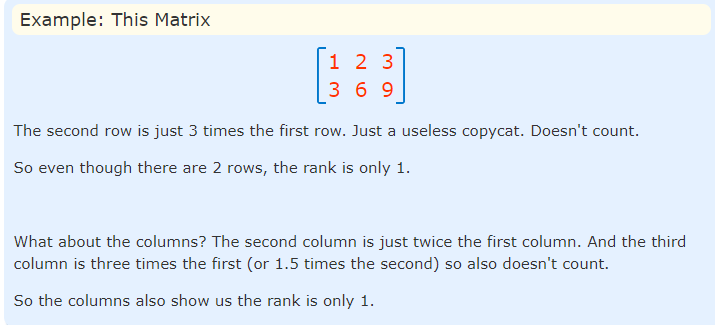

### Why Find the Rank?

* The rank tells us a lot about the matrix.

* It is useful in letting us know if we have a chance of solving a system of linear equations: when the rank equals the number of variables we may be able to find a unique solution.

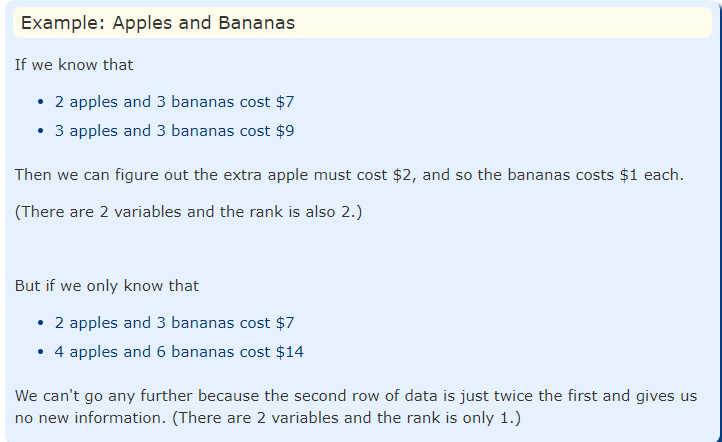

## Real time Prediction

In [16]:
# knowing the features
pd.set_option('max_columns', 50)
x.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [17]:
prediction = model1.predict([[6.575, 4.98, 15.3]])
print(prediction)

[635709.06102659]


In [18]:
data[(data['RM'] == 6.575)]

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0


In [22]:
prediction = model3.predict([[6.757, 4.98, 15.3]])
print(prediction)

[650656.91626089]
